In [4]:
#All districts
import pandas as pd

def Reverse(lst): 
    return [ele for ele in reversed(lst)] 

df=pd.read_csv('patients.csv')
district_df = df.groupby('detecteddistrict')
district_list=[]
total_cases_list=[]
for name, group in district_df:  
    district_list.append(name)
    total_cases_list.append(len(group.index))

consolidated_df=pd.DataFrame(list(zip(district_list, total_cases_list)), 
               columns =['district_name', 'total_cases']) 
consolidated_df.sort_values(by=['total_cases'], inplace=True, ascending=False)
consolidated_df.to_csv('district_final.csv', header=False, index=False)

for district in district_list:
  mum_df=district_df.get_group(district)
  mum_df_1=mum_df[['currentstatus','dateannounced','detecteddistrict','statuschangedate']]

  confirmed_list=[]
  deceased_list=[]
  recovered_list=[]

  confirmed_total=[]
  deceased_total=[]
  recovered_total=[]

  confirmed_t=0
  deceased_t=0
  recovered_t=0

  date_list=mum_df_1.dateannounced.unique()
  date_list=Reverse(date_list)

  for date in date_list:
    confirmed=0
    deceased=0
    recovered=0
    for index, row in mum_df_1.iterrows(): 
      if(row['dateannounced']==date):
        confirmed+=1
      if(row['statuschangedate']==date and row['currentstatus']=='Recovered'):
        recovered+=1
      if(row['statuschangedate']==date and row['currentstatus']=='Deceased'):
        deceased+=1 
  
    confirmed_t+=confirmed
    deceased_t+=deceased
    recovered_t+=recovered
  
    confirmed_list.append(confirmed)
    confirmed_total.append(confirmed_t)
    deceased_list.append(deceased)
    deceased_total.append(deceased_t)
    recovered_list.append(recovered) 
    recovered_total.append(recovered_t)

  final_df=pd.DataFrame(list(zip(date_list, confirmed_list, confirmed_total, recovered_list, recovered_total, deceased_list, deceased_total)), 
               columns =['date', 'confirmed_cases', 'total_confirmed', 'recovered_cases', 'total_recovered', 'deceased_cases', 'total_deceased'])
  if(district=='Italians*'):
    final_df.to_csv('Italians'+'.csv', header=False, index=False)
    continue
  if(district=='Other Region*'):
    final_df.to_csv('Other_Region'+'.csv', header=False, index=False)
    continue
  if(district=='Other States*'):
    final_df.to_csv('Other_States'+'.csv', header=False, index=False)
    continue
  if(district=='Gujarat*'):
    final_df.to_csv('Gujarat'+'.csv', header=False, index=False)
    continue
  final_df.to_csv(district+'.csv', header=False, index=False)

In [15]:
import pandas as pd

df=pd.read_csv('patients.csv')
district_df = df.groupby('detecteddistrict')

district_list=[]
total_deaths_list=[]
total_cases_list=[]
mortality_rate_list=[]

for name, group in district_df:  
    d=0
    district_list.append(name)
    confirmed_cases=len(group.index)
    total_cases_list.append(confirmed_cases)
    for index, row in group.iterrows():
        if(row['currentstatus']=='Deceased'):
            d=d+1
    total_deaths_list.append(d)
    mortality=(d/confirmed_cases)*100
    mortality_rate_list.append(mortality)

consolidated_df=pd.DataFrame(list(zip(district_list, total_cases_list, total_deaths_list, mortality_rate_list)), 
               columns =['district_name', 'total_cases', 'total_deaths', 'mortality_rates']) 
consolidated_df.sort_values(by=['total_deaths'], inplace=True, ascending=False)
consolidated_df.to_csv('district_mortality_sort.csv', header=True, index=False)

In [13]:
import pandas as pd

m=0
df=pd.read_csv('patients.csv')
df['currentstatus'].unique()
for index, row in df.iterrows():
    if(row['currentstatus']=='Migrated'):
        print(row)
    if(row['currentstatus']=='Deceased'):
        m=m+1
print(m)

agebracket                                                                           NaN
backupnotes                                Travelled to Singapore (Feb) and Canada (Mar)
contractedfromwhichpatientsuspected                                                  NaN
currentstatus                                                                   Migrated
dateannounced                                                                 17/03/2020
detectedcity                                                                       Saket
detecteddistrict                                                             South Delhi
detectedstate                                                                      Delhi
estimatedonsetdate                                                                   NaN
gender                                                                               NaN
nationality                                                                        India
notes                

In [17]:
import pandas as pd

df=pd.read_csv('patients.csv')
state_df = df.groupby('detectedstate')

state_list=[]
total_deaths_list=[]
total_cases_list=[]
mortality_rate_list=[]

for name, group in state_df:  
    d=0
    state_list.append(name)
    confirmed_cases=len(group.index)
    total_cases_list.append(confirmed_cases)
    for index, row in group.iterrows():
        if(row['currentstatus']=='Deceased'):
            d=d+1
    total_deaths_list.append(d)
    mortality=(d/confirmed_cases)*100
    mortality_rate_list.append(mortality)

consolidated_df=pd.DataFrame(list(zip(state_list, total_cases_list, total_deaths_list, mortality_rate_list)), 
               columns =['state_name', 'total_cases', 'total_deaths', 'mortality_rates']) 
consolidated_df.sort_values(by=['total_deaths'], inplace=True, ascending=False)
consolidated_df.to_csv('state_mortality_sort.csv', header=True, index=False)

In [18]:
import pandas as pd

df=pd.read_csv('patients.csv')
all_state_df=df.groupby('detectedstate')

maha_df=all_state_df.get_group('Maharashtra')

district_df = maha_df.groupby('detecteddistrict')

district_list=[]
total_deaths_list=[]
total_cases_list=[]
mortality_rate_list=[]

for name, group in district_df:  
    d=0
    district_list.append(name)
    confirmed_cases=len(group.index)
    total_cases_list.append(confirmed_cases)
    for index, row in group.iterrows():
        if(row['currentstatus']=='Deceased'):
            d=d+1
    total_deaths_list.append(d)
    mortality=(d/confirmed_cases)*100
    mortality_rate_list.append(mortality)

consolidated_df=pd.DataFrame(list(zip(district_list, total_cases_list, total_deaths_list, mortality_rate_list)), 
               columns =['district_name', 'total_cases', 'total_deaths', 'mortality_rates']) 
consolidated_df.sort_values(by=['total_deaths'], inplace=True, ascending=False)
consolidated_df.to_csv('Maharashtra_mortality_sort.csv', header=True, index=False)

In [25]:
#All districts
import pandas as pd

def Reverse(lst): 
    return [ele for ele in reversed(lst)] 

df=pd.read_csv('patients.csv')
district_df = df.groupby('detecteddistrict')
district_list=[]
total_cases_list=[]
for name, group in district_df:  
    district_list.append(name)
    total_cases_list.append(len(group.index))

consolidated_df=pd.DataFrame(list(zip(district_list, total_cases_list)), 
               columns =['district_name', 'total_cases']) 
consolidated_df.sort_values(by=['total_cases'], inplace=True, ascending=False)
#consolidated_df.to_csv('district_final.csv', header=False, index=False)

edit_list=['Mumbai','Thane','Indore','Kurnool','Jaipur','Pune','Chennai','Bengaluru','Ahmadabad','Bhopal']

for district in edit_list:
  mum_df=district_df.get_group(district)
  mum_df_1=mum_df[['currentstatus','dateannounced','detecteddistrict','statuschangedate']]

  confirmed_list=[]
  deceased_list=[]
  recovered_list=[]

  confirmed_total=[]
  deceased_total=[]
  recovered_total=[]

  confirmed_t=0
  deceased_t=0
  recovered_t=0

  date_list=mum_df_1.dateannounced.unique()
  date_list=Reverse(date_list)

  for date in date_list:
    confirmed=0
    deceased=0
    recovered=0
    for index, row in mum_df_1.iterrows(): 
      if(row['dateannounced']==date):
        confirmed+=1
      if(row['statuschangedate']==date and row['currentstatus']=='Recovered'):
        recovered+=1
      if(row['statuschangedate']==date and row['currentstatus']=='Deceased'):
        deceased+=1 
  
    confirmed_t+=confirmed
    deceased_t+=deceased
    recovered_t+=recovered
  
    confirmed_list.append(confirmed)
    confirmed_total.append(confirmed_t)
    deceased_list.append(deceased)
    deceased_total.append(deceased_t)
    recovered_list.append(recovered) 
    recovered_total.append(recovered_t)
  
  final_df=pd.DataFrame(list(zip(date_list, confirmed_list, confirmed_total, recovered_list, recovered_total, deceased_list, deceased_total)), 
               columns =['A','B','C','D','E','F','G'])
  final_df.to_csv("csv_files/{}".format(district+'.csv'), index=False)

In [28]:
import pandas as pd
import os

entries = os.listdir('csv_files/')

def Insert_row_(row_number, df, row_value): 
    # Slice the upper half of the dataframe 
    df1 = df[0:row_number] 
   
    # Store the result of lower half of the dataframe 
    df2 = df[row_number:] 
   
    # Inser the row in the upper half dataframe 
    df1.loc[row_number]=row_value 
   
    # Concat the two dataframes 
    df_result = pd.concat([df1, df2]) 
   
    # Reassign the index labels 
    df_result.index = [*range(df_result.shape[0])] 
   
    # Return the updated dataframe 
    return df_result 

for y in entries:
    df = pd.read_csv("csv_files/{}".format(y))
    first_date = df.at[0, 'A']
    first_date = int(first_date.split('/')[0])

    i = 2

    for x in range(i,first_date):
        if (x < 10):
            df = Insert_row_(x-i, df, ["0{}/03/2020".format(x), 0, 0, 0, 0, 0, 0])
        else:
            df = Insert_row_(x-i, df, ["{}/03/2020".format(x), 0, 0, 0, 0, 0, 0])

    print (df)

    df.to_csv("csv_files_normalized/{}".format(y), header=False, index=False)

    df_rows = df.shape[0]
    last_date = df.at[df_rows-1, 'A']
    last_date_int = int(last_date.split('/')[0])

    j = 1

    date = first_date

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


             A   B    C  D  E  F  G
0   02/03/2020   0    0  0  0  0  0
1   03/03/2020   0    0  0  0  0  0
2   04/03/2020   0    0  0  0  0  0
3   05/03/2020   0    0  0  0  0  0
4   06/03/2020   0    0  0  0  0  0
5   07/03/2020   0    0  0  0  0  0
6   08/03/2020   0    0  0  0  0  0
7   09/03/2020   0    0  0  0  0  0
8   10/03/2020   0    0  0  0  0  0
9   11/03/2020   0    0  0  0  0  0
10  12/03/2020   0    0  0  0  0  0
11  13/03/2020   0    0  0  0  0  0
12  14/03/2020   0    0  0  0  0  0
13  15/03/2020   0    0  0  0  0  0
14  16/03/2020   0    0  0  0  0  0
15  17/03/2020   0    0  0  0  0  0
16  18/03/2020   0    0  0  0  0  0
17  19/03/2020   0    0  0  0  0  0
18  20/03/2020   3    3  1  1  0  0
19  21/03/2020   2    5  0  1  0  0
20  22/03/2020   3    8  0  1  0  0
21  23/03/2020   6   14  0  1  0  0
22  28/03/2020   3   17  0  1  0  0
23  29/03/2020   4   21  0  1  0  0
24  30/03/2020   1   22  0  1  0  0
25  31/03/2020   1   23  0  1  0  0
26  01/04/2020   8   31  0  

             A    B    C  D  E  F  G
0   02/03/2020    0    0  0  0  0  0
1   03/03/2020    0    0  0  0  0  0
2   04/03/2020    0    0  0  0  0  0
3   05/03/2020    0    0  0  0  0  0
4   06/03/2020    0    0  0  0  0  0
5   07/03/2020    0    0  0  0  0  0
6   08/03/2020    0    0  0  0  0  0
7   09/03/2020    0    0  0  0  0  0
8   10/03/2020    0    0  0  0  0  0
9   11/03/2020    2    2  0  0  0  0
10  12/03/2020    1    3  0  0  1  1
11  14/03/2020    4    7  0  0  0  1
12  16/03/2020    3   10  0  0  0  1
13  17/03/2020    1   11  0  0  0  1
14  18/03/2020    1   12  0  0  0  1
15  19/03/2020    1   13  0  0  0  1
16  20/03/2020    4   17  0  0  0  1
17  21/03/2020    7   24  0  0  0  1
18  22/03/2020    5   29  0  0  1  2
19  23/03/2020   12   41  0  0  0  2
20  24/03/2020    2   43  0  0  0  2
21  25/03/2020    8   51  0  0  0  2
22  26/03/2020    1   52  0  0  0  2
23  27/03/2020    3   55  0  0  0  2
24  28/03/2020   25   80  0  0  0  2
25  29/03/2020    5   85  0  0  0  2
2

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import csv

N, T, t_l, t_e, t_changeKt, kspread = None, None, None, None, None, None # Set later depending on country
samplesPerDay = 10

startingTested = 14
daysOffset = 14

In [9]:
## THE SIER-X MODEL
def getPreds(beta = 0.2, beta1 = 0.1, sigma = 1/38.0, plot = False):
    global N, T, t_l, t_e, t_changeKt, kspread
    # Total population, N.

    # Initial number of infected and recovered individuals, I0 and R0.
    # Everyone else, S0, is susceptible to infection initially.

    K0 = 1./7
    MU = 1./7
    gamma1 = 1./19
    gamma2 = 1./14
    gamma3 = 1./14
    b1 = beta1
    b2 = 0.1 * beta1
    b3 = 0.002 * beta1
    
#     A0, I0, Xs0, Xa0, Xi0, P0, R0 = 1, 0, 0, 0, 0, 0, 0
    totalInfected = startingTested * 20; pIgivenA = 0.33
    A0 = totalInfected * (1.0 - pIgivenA) ;P0 = startingTested;I0 = totalInfected * pIgivenA - P0 ;Xs0 = 0;Xa0 = 0;Xi0 = 0; R0 = 0
    
    S0 = N - A0 - I0 - Xs0 - Xa0 - Xi0 - P0 - R0

    t = np.linspace(0, T, samplesPerDay*T)

    def deriv(y, t, N, beta):
        S, A, I, Xs, Xa, Xi, P, R = y

        if t < t_l or t > t_e:
            k0 = 0
        else:
            k0 = K0
            
        if t > t_changeKt:
            kt = kt2 = 0.5
        else:
            kt = 0.075; kt2 = 0

        if t > t_e:
            mu = MU
        else:
            mu = 0

        dSdt = - beta * (I + kspread * (A + b1 * Xa) + b2 * Xi + b3 * P) * S/N - k0 * S + mu * Xs
        dAdt = beta * (I + kspread * (A + b1 * Xa) + b2 * Xi + b3 * P) * S/N - sigma * A - k0 * A + mu * Xa - gamma1 * A - kt2 * A
        dIdt = sigma * A  - kt * I - k0 * I + mu * Xi - gamma2 * I

        dXsdt = - beta * beta1 * (I + kspread * (A + b1 * Xa) + b2 * Xi + b3 * P) * Xs/N + k0 * S - mu * Xs
        dXadt = beta * beta1 * (I + kspread * (A + b1 * Xa) + b2 * Xi + b3 * P) * Xs/N - sigma * Xa + k0 * A - mu * Xa - gamma1 * Xa - kt2 * Xa
        dXidt = sigma * Xa - kt * Xi + k0 * I - mu * Xi - gamma2 * Xi

        dPdt = kt * (I + Xi) - gamma3 * P + kt2 * (A + Xa)
        dRdt = gamma1 * (A + Xa) + gamma2 * (I + Xi) + gamma3 * P

        return dSdt, dAdt, dIdt, dXsdt, dXadt, dXidt, dPdt, dRdt

    # Initial conditions vector
    y0 = S0, A0, I0, Xs0, Xa0, Xi0, P0, R0
    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N, beta))
    S, A, I, Xs, Xa, Xi, P, R = ret.T
    if not plot: return P, R
    else: return P, I + Xi + P, P + I + Xi + A + Xa

# temp = getPreds(0.31, 0)

In [32]:
def readDataMaharashtra(startIndex = 0):
    file = open('Bengaluru.csv', 'r')
    reader = csv.reader(file)
    confirmed, recovered, dead = None, None, None
    count = -1
    i, r = [], []
    for row in reader:
        count += 1
        if count < startIndex: continue
        confirmed = int(row[2])
        recovered = int(row[4])
        dead = int(row[6])
        r.append(recovered + dead)
        i.append(confirmed - r[-1])
    file.close()
    return i, r

# Start from March 01, when the first case in this spread started, adjust counts as needed
# actualI, actualR = readDataIndia(startDate = "01 March")
# T = 50
# t_l = 23 # From 24 March, ignore Janta Curfew?
# t_e = 44
# actualI = np.asarray(actualI); actualR = np.asarray(actualR)
# N = 1300000000

# actualI, actualR = readDataIndia(startDate = "01 March")
# T = 50 - daysOffset
# t_l = 23 - daysOffset# From 24 March, ignore Janta Curfew?
# t_e = 44 - daysOffset
# actualI = np.asarray(actualI[daysOffset:]); actualR = np.asarray(actualR[daysOffset:])
# N = 1300000000


# Maharashtra Data
actualI, actualR = readDataMaharashtra()
actualI = np.asarray(actualI); actualR = np.asarray(actualR)
T = 62 - daysOffset
t_l = 24 - daysOffset
t_e = 24 + 21 - daysOffset
N = 9620000
t_changeKt = 1000000000
kspread = 1.0

In [33]:
# Define loss and search for the best hyperparameters (grid search for now)
def squaredLoss(preds, target):
    loss = ((preds - target) ** 2).sum()
    return loss

eps = 1e-8
def squaredLossExpScale(preds, target):
    preds = np.log(preds + eps)
    target = np.log(target + eps)
    loss = ((preds - target) ** 2).sum()
    return loss

bestLoss = 10000000000
bestBeta, bestBeta1 = -1, -1
bestPreds = None
betaValues = np.linspace(0.1, 0.6, 51)
beta1Values = np.linspace(0.6, 1.0, 41)
losses = np.zeros((len(betaValues), len(beta1Values)))

for i, beta in enumerate(betaValues):
    for j, beta1 in enumerate(beta1Values):
        predI, predR = getPreds(beta = beta, beta1 = beta1)
        trimmedPredI = predI[:len(actualI) * samplesPerDay:samplesPerDay]
        trimmedPredR = predR[:len(actualR) * samplesPerDay:samplesPerDay]
        assert len(trimmedPredI) == len(actualI) and len(trimmedPredR) == len(actualR), "Length mismatch"
        loss = squaredLoss(trimmedPredI, actualI)
        losses[i, j] = loss
        
        if loss < bestLoss:
            bestLoss = loss
            bestPreds = predI, predR
            bestBeta = beta; bestBeta1 = beta1

print("Best beta value", bestBeta)
print("Best beta1 value", bestBeta1)
print("Best loss value", bestLoss)

Best beta value 0.1
Best beta1 value 0.6
Best loss value 31032.866935641607


C:\Users\user\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


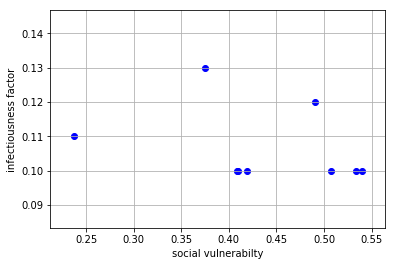

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

model_df=pd.read_csv('Vulnerability_Analysis_data - Infection rates.csv')

array=model_df.values 

y=np.array(array[1:10,1:2])
X=np.array(array[1:10,2])

plt.scatter(X, y, color = 'blue') 
plt.xlabel('social vulnerabilty')
plt.ylabel('infectiousness factor')
plt.grid('True')
plt.show()